# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [272]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


#Saving date in format to use for charts
Label_date = datetime.date(datetime.now())

# Output File (CSV)
output_data_file = "Output/city_data_" + str(Label_date) + ".csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [268]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [269]:
#Insert the list of city names into a dataframe for easy storage and calculations
city_df = pd.DataFrame(cities, columns =['City'])

#add columns to the dataframe
city_df['Date_Updated'] = ""
city_df['Latitude'] = ""
city_df['Longitude'] = ""
city_df['Temperature_Max'] = ""
city_df['Humidity'] = ""
city_df['Cloudiness'] = ""
city_df['Wind_Speed'] = ""

city_df.head()

,City,Date_Updated,Latitude,Longitude,Temperature_Max,Humidity,Cloudiness,Wind_Speed
0,attawapiskat,,,,,,,
1,sao sebastiao do passe,,,,,,,
2,kavieng,,,,,,,
3,vaini,,,,,,,
4,lebu,,,,,,,


In [270]:
# This section will cycle through the city names in the dataframe and pull the required fields from the jason to populate the information
# if the city does not exist or errors, it will skip the city name and move to the next.

# set required variables that will be used in the below loop to call the api in json format
# uses imperial system of measurement
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
row_count = 0
total_count = len(city_df.index)

print("Beginning Data Retrieval")
print("-----------------------------")

for index,row in city_df.iterrows():
    row_count = row_count + 1
    city_name = city_df.loc[index, 'City']
    print(f"Processing Record {row_count} of {total_count} | {city_name}")
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q={city_name}"
    response = requests.get(query_url).json()
    try:
        city_df.loc[index, 'Date_Updated'] = datetime.date(datetime.now())
        city_df.loc[index, 'Latitude'] = response['coord']['lat']
        city_df.loc[index, 'Longitude']  = response['coord']['lon']
        city_df.loc[index, 'Temperature_Max']  = response['main']['temp_max']
        city_df.loc[index, 'Humidity']  = response['main']['humidity']
        city_df.loc[index, 'Cloudiness']  = response['clouds']['all']
        city_df.loc[index, 'Wind_Speed']  = response['wind']['speed']
    except:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 616 | attawapiskat
City not found. Skipping...
Processing Record 2 of 616 | sao sebastiao do passe
Processing Record 3 of 616 | kavieng
Processing Record 4 of 616 | vaini
Processing Record 5 of 616 | lebu
Processing Record 6 of 616 | guerrero negro
Processing Record 7 of 616 | arraial do cabo
Processing Record 8 of 616 | vetluzhskiy
Processing Record 9 of 616 | qaanaaq
Processing Record 10 of 616 | villarrica
Processing Record 11 of 616 | cockburn town
Processing Record 12 of 616 | ushuaia
Processing Record 13 of 616 | rikitea
Processing Record 14 of 616 | taolanaro
City not found. Skipping...
Processing Record 15 of 616 | acari
Processing Record 16 of 616 | oranjestad
Processing Record 17 of 616 | leshukonskoye
Processing Record 18 of 616 | elko
Processing Record 19 of 616 | carnarvon
Processing Record 20 of 616 | georgetown
Processing Record 21 of 616 | sao filipe
Processing Record 22 of 616 | padang
Proces

Processing Record 188 of 616 | ambilobe
Processing Record 189 of 616 | bom jardim
Processing Record 190 of 616 | saint anthony
Processing Record 191 of 616 | chimore
Processing Record 192 of 616 | yaransk
Processing Record 193 of 616 | pangnirtung
Processing Record 194 of 616 | udachnyy
Processing Record 195 of 616 | samusu
City not found. Skipping...
Processing Record 196 of 616 | ancud
Processing Record 197 of 616 | port alfred
Processing Record 198 of 616 | grimari
City not found. Skipping...
Processing Record 199 of 616 | landskrona
Processing Record 200 of 616 | bonavista
Processing Record 201 of 616 | khatanga
Processing Record 202 of 616 | kodiak
Processing Record 203 of 616 | yashan
Processing Record 204 of 616 | atar
Processing Record 205 of 616 | igarka
Processing Record 206 of 616 | morros
Processing Record 207 of 616 | port hardy
Processing Record 208 of 616 | tatarsk
Processing Record 209 of 616 | makakilo city
Processing Record 210 of 616 | haines junction
Processing Reco

Processing Record 380 of 616 | lancaster
Processing Record 381 of 616 | kununurra
Processing Record 382 of 616 | camana
Processing Record 383 of 616 | aukra
Processing Record 384 of 616 | komsomolskiy
Processing Record 385 of 616 | alyangula
Processing Record 386 of 616 | atasu
Processing Record 387 of 616 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 388 of 616 | meiganga
Processing Record 389 of 616 | impfondo
Processing Record 390 of 616 | caravelas
Processing Record 391 of 616 | safaga
Processing Record 392 of 616 | chippenham
Processing Record 393 of 616 | carballo
Processing Record 394 of 616 | biak
Processing Record 395 of 616 | davila
Processing Record 396 of 616 | santiago
Processing Record 397 of 616 | lac-megantic
Processing Record 398 of 616 | assiniboia
Processing Record 399 of 616 | pishva
Processing Record 400 of 616 | nanakuli
Processing Record 401 of 616 | aleppo
Processing Record 402 of 616 | rakiv lis
Processing Record 403 of 616 | plettenberg 

Processing Record 573 of 616 | arbon
Processing Record 574 of 616 | edmundston
Processing Record 575 of 616 | clovis
Processing Record 576 of 616 | fevralsk
City not found. Skipping...
Processing Record 577 of 616 | kaeo
Processing Record 578 of 616 | takoradi
Processing Record 579 of 616 | tete
Processing Record 580 of 616 | alice springs
Processing Record 581 of 616 | wajid
Processing Record 582 of 616 | khani
Processing Record 583 of 616 | steenwijk
Processing Record 584 of 616 | semenivka
Processing Record 585 of 616 | port arthur
Processing Record 586 of 616 | arona
Processing Record 587 of 616 | sorland
Processing Record 588 of 616 | abnub
Processing Record 589 of 616 | waipawa
Processing Record 590 of 616 | pa daet
Processing Record 591 of 616 | ariquemes
Processing Record 592 of 616 | virginia beach
Processing Record 593 of 616 | rudsar
Processing Record 594 of 616 | belaya gora
Processing Record 595 of 616 | moose factory
Processing Record 596 of 616 | port moresby
Processing 

In [273]:
# Remove NA columns from the dataframe where and provid information to how many were removed
# I couldn't get dropna to work with the results from Openweather, so I did this instead
city_df = city_df.loc[city_df['Latitude'] != '']
new_count = len(city_df.index)
removed_count = total_count - new_count

print(f"{removed_count} cities were droped due to non-reponse from open weather.")

city_df.reset_index()
city_df.to_csv(output_data_file, index=False, header=True)

54 cities were droped due to non-reponse from open weather.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# This was done prior to analysis and adding data - I can recode if needed, but seems unneeded

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

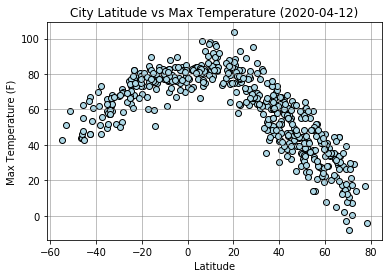

In [274]:
# The below chart compares the global latitude of a city with the 
# maximum temperature for that city on the selected date. It shows that 
# as the closer to the equator the city is located the higher the temperature. 
plt.title("City Latitude vs Max Temperature (" + str(Label_date) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Max Temperature (F)", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)


plt.scatter(city_df["Latitude"],city_df["Temperature_Max"], color='lightblue',edgecolor='black')
chart_output = "Output/Lat_Temp_" + str(Label_date) + ".png"
plt.savefig(chart_output)
plt.show()

#### Latitude vs. Humidity Plot

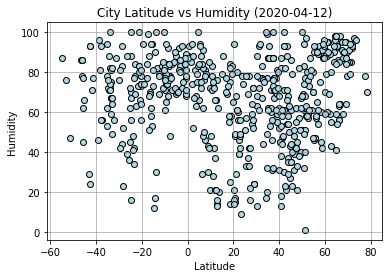

In [275]:
# The below chart compares the global latitude of a city with the 
# humidity for that city on the selected date. While there is loose correlation
# the data showing the highest humidity is clustered  in far north countries.
plt.title("City Latitude vs Humidity (" + str(Label_date) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Humidity", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)

plt.scatter(city_df["Latitude"],city_df["Humidity"], color='lightblue',edgecolor='black')
chart_output = "Output/Lat_Humidity_" + str(Label_date) + ".png"
plt.savefig(chart_output)
plt.show()

#### Latitude vs. Cloudiness Plot

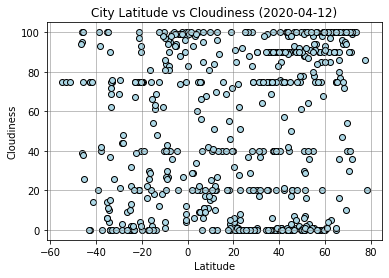

In [276]:
# The below chart compares the global latitude of a city with the 
# cloudiness for that city on the selected date. There is almost no coorelation
# between latitude and cloudiness shown in the data. 
plt.title("City Latitude vs Cloudiness (" + str(Label_date) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Cloudiness", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)

plt.scatter(city_df["Latitude"],city_df["Cloudiness"], color='lightblue',edgecolor='black')
chart_output = "Output/Lat_Cloud_" + str(Label_date) + ".png"
plt.savefig(chart_output)
plt.show()

#### Latitude vs. Wind Speed Plot

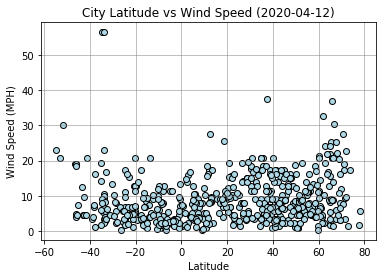

In [277]:
# The below chart compares the global latitude of a city with the 
# Wind Speed in the city on the selected date. As with cloudiness the data shows 
# almost no coorelation between latitude and wind speed. 
plt.title("City Latitude vs Wind Speed (" + str(Label_date) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Wind Speed (MPH)", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)

plt.scatter(city_df["Latitude"],city_df["Wind_Speed"], color='lightblue',edgecolor='black')
chart_output = "Output/Lat_Wind_" + str(Label_date) + ".png"
plt.savefig(chart_output)
plt.show()

## Linear Regression

In [278]:
# OPTIONAL: Create a function to create Linear Regression plots
def liner_reg_plot(x, y, title, hemi):
    
    correlation = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.astype(float), y.astype(float))
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    #chart_title = {hemi} + "/n" + "City Latitude vs {title} (" + {Label_date} + ")"
    #plt.figure(figsize = (10,4))
    print(f"The r-squared is: {rvalue}")
    plt.title(f"{hemi}  City Latitude vs {title}", fontsize=12, wrap=True)
    plt.xlabel("Latitude", fontsize=10)
    plt.ylabel(f"{title}", fontsize=10)  
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(min(x)+10,min(y)+10),fontsize=15,color="red")
    plt.grid(color='gray', linestyle='-', linewidth=.5)
    plt.scatter(x,y, color='lightblue',edgecolor='black')
    plt.show()
    
    #return (line_eq, regress_values)

In [279]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df.loc[city_df['Latitude'] > 0] 
south_df = city_df.loc[city_df['Latitude'] < 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8870336803432559


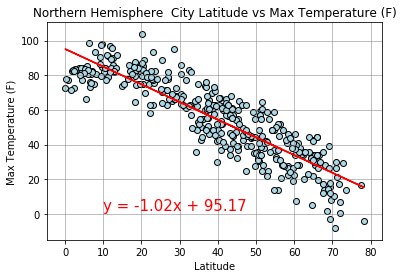

In [280]:
x = north_df["Latitude"]
y = north_df["Temperature_Max"]
title = "Max Temperature (F)"
hemi = 'Northern Hemisphere'

liner_reg_plot(x,y,title,hemi)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7852410092848202


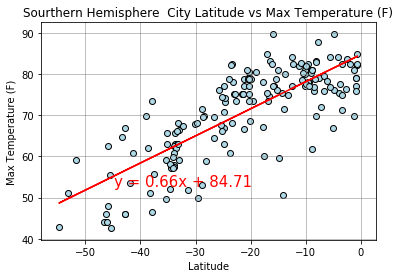

In [281]:
x = south_df["Latitude"]
y = south_df["Temperature_Max"]
title = "Max Temperature (F)"
hemi = 'Sourthern Hemisphere'

liner_reg_plot(x,y,title, hemi)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22371919609155416


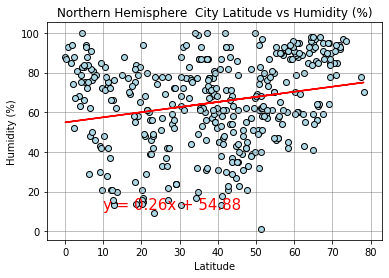

In [282]:
x = north_df["Latitude"]
y = north_df["Humidity"]
title = "Humidity (%)"
hemi = 'Northern Hemisphere'

liner_reg_plot(x,y,title,hemi)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17060914159600482


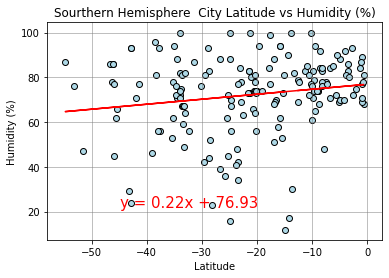

In [283]:
x = south_df["Latitude"]
y = south_df["Humidity"]
title = "Humidity (%)"
hemi = 'Sourthern Hemisphere'

liner_reg_plot(x,y,title, hemi)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26052679085676295


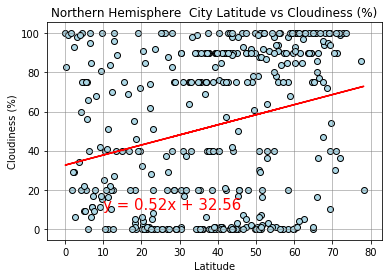

In [284]:
x = north_df["Latitude"]
y = north_df["Cloudiness"]
title = "Cloudiness (%)"
hemi = 'Northern Hemisphere'

liner_reg_plot(x,y,title,hemi)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16672076199180882


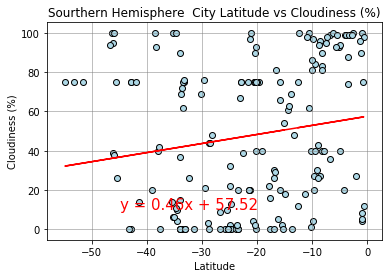

In [285]:
x = south_df["Latitude"]
y = south_df["Cloudiness"]
title = "Cloudiness (%)"
hemi = 'Sourthern Hemisphere'

liner_reg_plot(x,y,title, hemi)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1513859104629392


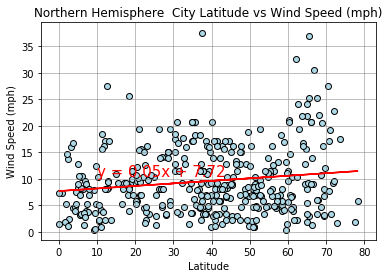

In [286]:
x = north_df["Latitude"]
y = north_df["Wind_Speed"]
title = "Wind Speed (mph)"
hemi = 'Northern Hemisphere'

liner_reg_plot(x,y,title,hemi)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3475483664343002


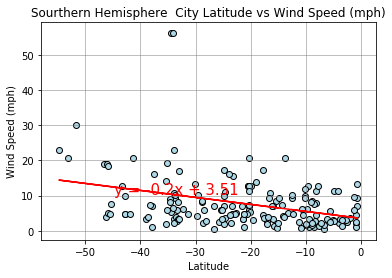

In [287]:
x = south_df["Latitude"]
y = south_df["Wind_Speed"]
title = "Wind Speed (mph)"
hemi = 'Sourthern Hemisphere'

liner_reg_plot(x,y,title, hemi)